# Random Forest
First, we tested combinations of `random_state` for multiple `n_estimators`, then `max_depth` for multiple `n_jobs`. Finaly, we chose multiple values of each parameter and trained the model with all combinations to see the best result.

## Conclusion
The Random Forest Classifier model achieved a very good maximum accuracy of `0.869`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# load data
data = pd.read_csv("../data/train_data.csv")
data_labels = pd.read_csv("../data/train_data_labels.csv")
test = pd.read_csv("../data/train_test.csv")
test_labels = pd.read_csv("../data/train_test_labels.csv")

print("Data shape:", data.shape)
print("Data labels shape:", data_labels.shape)
print("Test shape:", test.shape)
print("Test labels shape:", test_labels.shape)

Data shape: (784, 3)
Data labels shape: (784, 1)
Test shape: (107, 3)
Test labels shape: (107, 1)


In [3]:
# convert data to 1D arrays
data_labels = data_labels.values.ravel()
test_labels = test_labels.values.ravel()

In [4]:
# test n_estimators and random_state combinations
n_estimators_ranges = range(2, 10, 1)
random_state_ranges = range(10, 10000, 1)
results_random = []

for n_estimators in n_estimators_ranges:
    results_random.append([])
    count = 0
    for random_state in random_state_ranges:
        clf = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
        clf.fit(data, data_labels)
        test_predictions = clf.predict(test)
        acc = accuracy_score(test_labels, test_predictions)
        results_random[-1].append(acc)
        if acc > 0.86:
            print(f"Found maximum accuracy {acc:.3f} with random_state={random_state} and n_estimators={n_estimators}")
            count += 1
    print(f"n_estimators={n_estimators}: accuracy>0.86 count={count}")

print("Maximum accuracy:", max([max(r) for r in results_random]))

n_estimators=2: accuracy>0.86 count=0
Found maximum accuracy 0.869 with random_state=959 and n_estimators=3
Found maximum accuracy 0.869 with random_state=2929 and n_estimators=3
Found maximum accuracy 0.869 with random_state=4045 and n_estimators=3
Found maximum accuracy 0.869 with random_state=4918 and n_estimators=3
n_estimators=3: accuracy>0.86 count=4
Found maximum accuracy 0.869 with random_state=9512 and n_estimators=4
n_estimators=4: accuracy>0.86 count=1
Found maximum accuracy 0.869 with random_state=301 and n_estimators=5
n_estimators=5: accuracy>0.86 count=1
Found maximum accuracy 0.869 with random_state=301 and n_estimators=6
Found maximum accuracy 0.869 with random_state=723 and n_estimators=6
Found maximum accuracy 0.869 with random_state=7940 and n_estimators=6
n_estimators=6: accuracy>0.86 count=3
Found maximum accuracy 0.869 with random_state=7940 and n_estimators=7
n_estimators=7: accuracy>0.86 count=1
Found maximum accuracy 0.869 with random_state=7878 and n_estimato

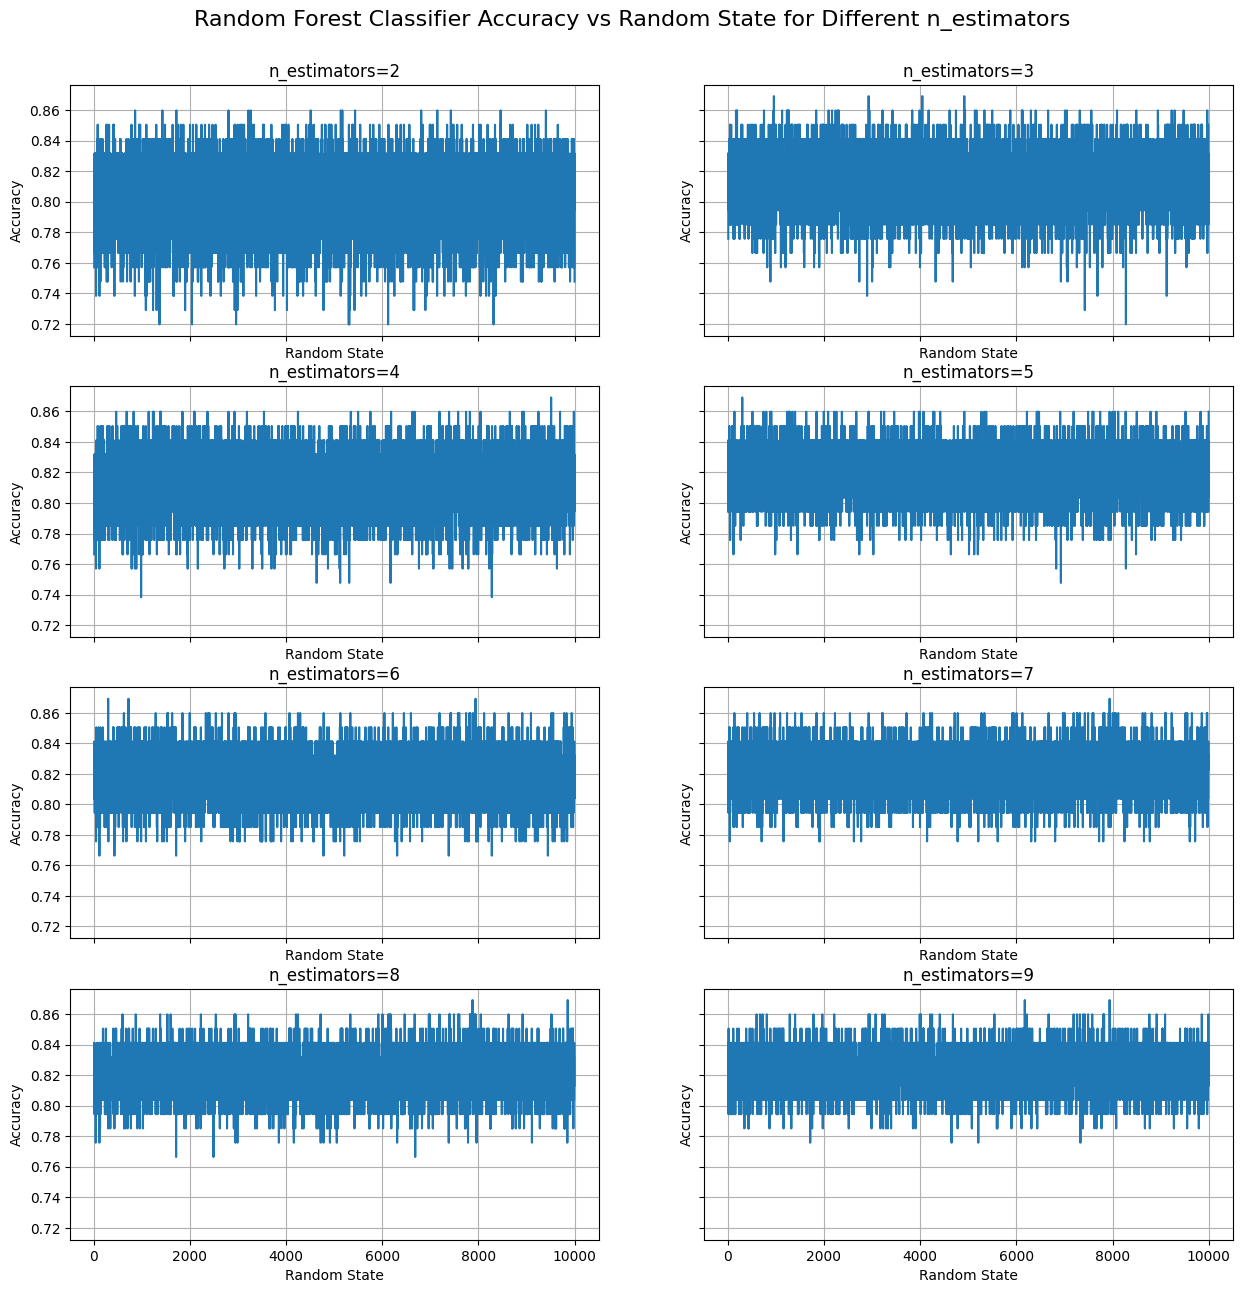

In [5]:
fig, axes = plt.subplots(4, 2, figsize=(15, 15), sharex=True, sharey=True)
axes = axes.flatten()

for idx, n_estimators in enumerate(n_estimators_ranges):
    axes[idx].plot(random_state_ranges, results_random[idx])
    axes[idx].set_title(f"n_estimators={n_estimators}")
    axes[idx].set_xlabel("Random State")
    axes[idx].set_ylabel("Accuracy")
    axes[idx].grid(True)

fig.suptitle("Random Forest Classifier Accuracy vs Random State for Different n_estimators", fontsize=16, y=0.93)

plt.savefig("../results/Random_Forest_Random_State.png")
plt.show()

In [6]:
# test n_jobs and max_depth combinations
n_jobs_ranges = [-4, -1, 1, 4, 10, None]
max_depth_ranges = [None, 1, 5, 10, 20, 50]
results_n_jobs = []

for max_depth in max_depth_ranges:
    results_n_jobs.append([])
    for n_jobs in n_jobs_ranges:
        clf = RandomForestClassifier(n_estimators=5, random_state=301, n_jobs=n_jobs, max_depth=max_depth)
        clf.fit(data, data_labels)
        test_predictions = clf.predict(test)
        acc = accuracy_score(test_labels, test_predictions)
        results_n_jobs[-1].append(acc)

print("Maxim accuracy:", max([max(r) for r in results_n_jobs]))

Maxim accuracy: 0.8691588785046729


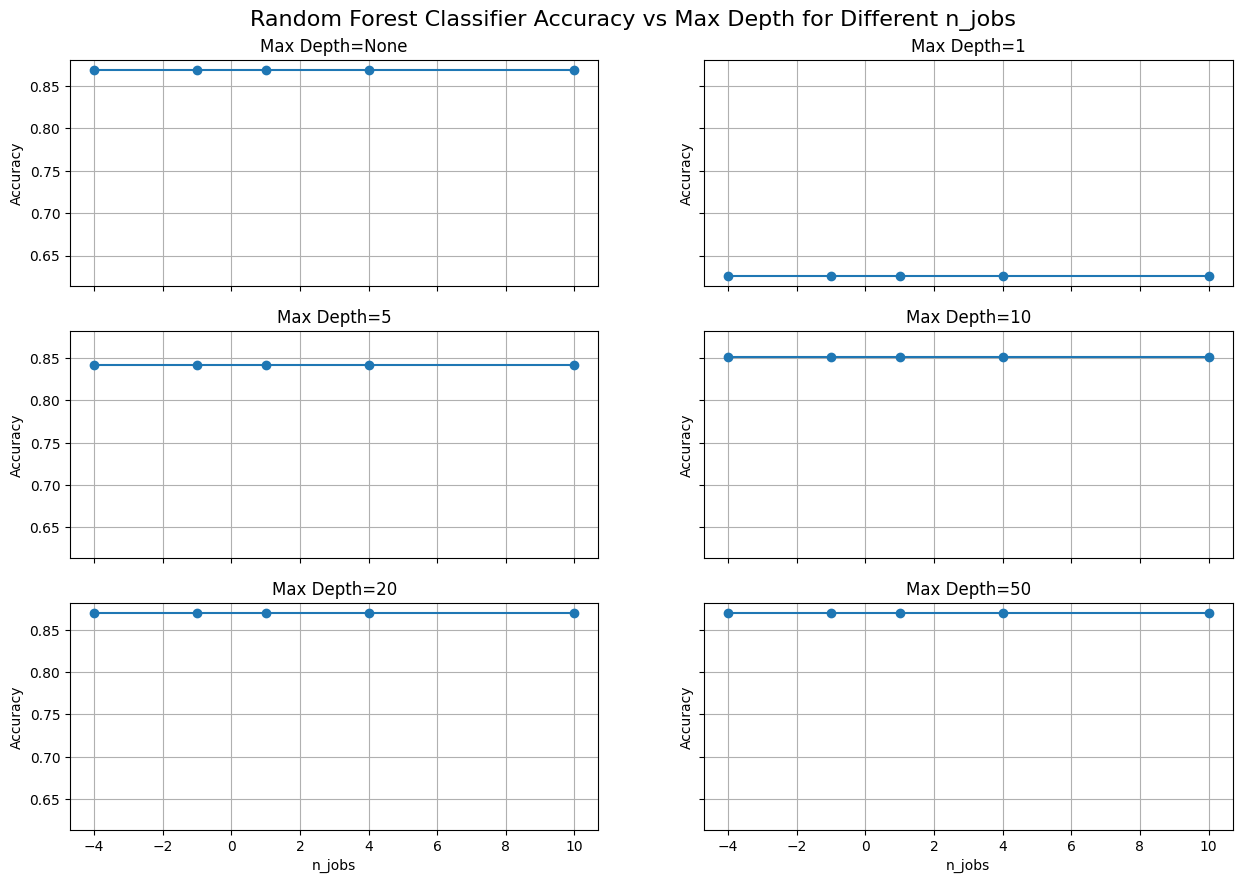

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10), sharex=True, sharey=True)
axes = axes.flatten()

for idx, max_depth in enumerate(max_depth_ranges):
    axes[idx].plot(list(n_jobs_ranges), results_n_jobs[idx], marker='o')
    axes[idx].set_title(f"Max Depth={max_depth}")
    if idx >= len(max_depth_ranges) - 2:
        axes[idx].set_xlabel("n_jobs")
    axes[idx].set_ylabel("Accuracy")
    axes[idx].grid(True)

fig.suptitle("Random Forest Classifier Accuracy vs Max Depth for Different n_jobs", fontsize=16, y=0.93)
plt.savefig("../results/Random_Forest_N_Jobs.png")
plt.show()

In [10]:
n_estimators_ranges = [3, 4, 8]
min_samples_split_ranges = [2, 10, 20]
min_samples_leaf_ranges = [1, 5, 10]
min_weight_fraction_leaf_ranges = [0.0, 0.1, 0.5]

max_features_ranges = [0.1, 0.5, 1.0, 'sqrt', 'log2']
max_leaf_nodes_ranges = [None, 5, 10, 50]
min_impurity_decrease_ranges = [0.0, 0.01, 0.1, 1.0]

n_jobs_ranges = [None, 1, 2, 4]
random_state_ranges = [959, 9512, 9857]
warm_start_ranges = [True, False]
class_weight_ranges = [None, 'balanced_subsample', 'balanced']
ccp_alpha_ranges = [0.0, 0.01, 0.1, 0.5, 1.0]
max_samples_ranges = [None, 0.1, 0.5, 1.0]

In [9]:
max_acc = 0.0
params = []
for n_estimators, random_state in zip(n_estimators_ranges, random_state_ranges):
    for min_samples_split in min_samples_split_ranges:
        for min_samples_leaf in min_samples_leaf_ranges:
            for min_weight_fraction_leaf in min_weight_fraction_leaf_ranges:
                for max_features in max_features_ranges:
                    for max_leaf_nodes in max_leaf_nodes_ranges:
                        for min_impurity_decrease in min_impurity_decrease_ranges:
                            for n_jobs in n_jobs_ranges:
                                for class_weight in class_weight_ranges:
                                    for ccp_alpha in ccp_alpha_ranges:
                                        for max_samples in max_samples_ranges:
                                            clf = RandomForestClassifier(
                                                n_estimators=n_estimators,
                                                random_state=random_state,
                                                min_samples_split=min_samples_split,
                                                min_samples_leaf=min_samples_leaf,
                                                min_weight_fraction_leaf=min_weight_fraction_leaf,
                                                max_features=max_features,
                                                max_leaf_nodes=max_leaf_nodes,
                                                min_impurity_decrease=min_impurity_decrease,
                                                n_jobs=n_jobs,
                                                class_weight=class_weight,
                                                ccp_alpha=ccp_alpha,
                                                max_samples=max_samples
                                            )
                                            clf.fit(data, data_labels)
                                            test_predictions = clf.predict(test)
                                            acc = accuracy_score(test_labels, test_predictions)
                                            if acc > 0.86:
                                                max_acc = acc
                                                params.append(clf.get_params())   

print(f"Maximum accuracy: {max_acc}")

Maximum accuracy: 0.8691588785046729


In [11]:
distinct_params = {}

for param_name in params[0].keys():
    distinct_params[param_name] = set()

for param_set in params:
    for param_name, param_value in param_set.items():
        distinct_params[param_name].add(param_value)

original_ranges = {
    'n_estimators': n_estimators_ranges,
    'random_state': random_state_ranges,
    'min_samples_split': min_samples_split_ranges,
    'min_samples_leaf': min_samples_leaf_ranges,
    'min_weight_fraction_leaf': min_weight_fraction_leaf_ranges,
    'max_features': max_features_ranges,
    'max_leaf_nodes': max_leaf_nodes_ranges,
    'min_impurity_decrease': min_impurity_decrease_ranges,
    'n_jobs': n_jobs_ranges,
    'warm_start': warm_start_ranges,
    'class_weight': class_weight_ranges,
    'ccp_alpha': ccp_alpha_ranges,
    'max_samples': max_samples_ranges
}

print("Parameter comparison: all values vs successful values")

for param_name, all_values in original_ranges.items():
    successful_values = list(distinct_params[param_name])
    print(f"\n{param_name}:")
    print(f"   All values:        {list(all_values)}")
    print(f"   Successful values: {successful_values}")

Parameter comparison: all values vs successful values

n_estimators:
   All values:        [3, 4, 8]
   Successful values: [8, 3, 4]

random_state:
   All values:        [959, 9512, 9857]
   Successful values: [9512, 9857, 959]

min_samples_split:
   All values:        [2, 10, 20]
   Successful values: [2]

min_samples_leaf:
   All values:        [1, 5, 10]
   Successful values: [1]

min_weight_fraction_leaf:
   All values:        [0.0, 0.1, 0.5]
   Successful values: [0.0]

max_features:
   All values:        [0.1, 0.5, 1.0, 'sqrt', 'log2']
   Successful values: [0.1, 0.5, 1.0, 'log2', 'sqrt']

max_leaf_nodes:
   All values:        [None, 5, 10, 50]
   Successful values: [None]

min_impurity_decrease:
   All values:        [0.0, 0.01, 0.1, 1.0]
   Successful values: [0.0]

n_jobs:
   All values:        [None, 1, 2, 4]
   Successful values: [None, 1, 2, 4]

warm_start:
   All values:        [True, False]
   Successful values: [False]

class_weight:
   All values:        [None, 'balance